<h1>Analiza glasbenih elementov</h1>

track: Total Eclipse - Freefalling Upwards

https://www.youtube.com/watch?v=bZ_e-4Y-jq4&list=RDbZ_e-4Y-jq4&start_radio=1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os

%matplotlib inline

# Enable autoreload of imported modules
%load_ext autoreload
%autoreload 2

from main_julia import AudioAnalyzer 
from main_julia import TRACK_PRESETS

audio_file = "music/TheMysteryoftheYetiPart2_track3.wav"
analyzer = AudioAnalyzer(audio_file)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[Trends] Low/Med=0.033  Med/High=0.060


Uporabimo razred AudioAnalyzer, ki za izbrano glasbeno datoteko izračuna različne signale in lastnosti, ki jih uporabimo pri animaciji fraktalov.
Shrani naslednje elemente:
- RMS (root mean square) – predstavlja glasnost zvoka po času, zglajen in normaliziran. V animaciji se uporablja kot parameter za izračun števila iteracij fraktala.
- Spektrogram (STFT) – frekvenčna analiza, kjer dobimo jakost različnih frekvenc v vsakem trenutku.
- Frekvence – pripadajoče frekvence za spektrogram.
- Onset envelope – zaznava naraščajoče spremembe v glasbi, npr. začetke novih udarcev ali energičnih segmentov.
- Tempo in beat-times – zaznava osnovni tempo in čas udarcev (beatov), ki se uporabljajo za usklajevanje animacije.


In [7]:
print(f"Duration: {analyzer.duration:.2f} seconds")
print(f"Sample rate: {analyzer.sr} Hz")
print(f"Number of RMS frames: {len(analyzer.rms)}")

Duration: 913.00 seconds
Sample rate: 48000 Hz
Number of RMS frames: 85594


<h2>RMS oz. volumen</h2>

RMS aproksimira jakost zvoka. V animaciji uporabimo zglajene in normalizirane vrednosti.

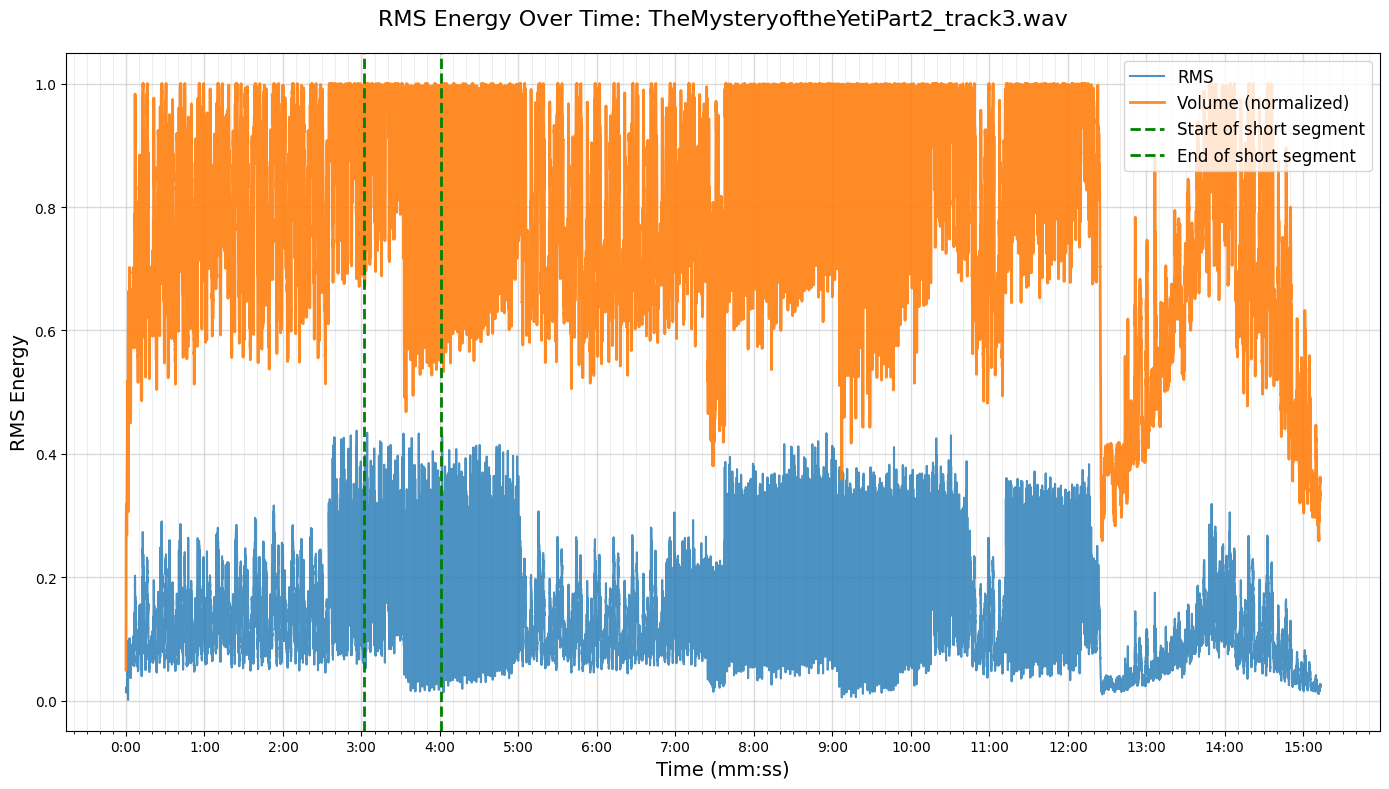

In [8]:
from plotting_functions_for_analysis import plot_RMS
plot_RMS(analyzer)

<h2>Spektrogram</h2> Spektrogram je način vizualizacije, kako se energija različnih frekvenčnih komponent zvoka spreminja skozi čas.

- Zvok razdelimo na kratke, deloma prekrivajoče se bloke in za vsak blok izvedemo Fourierjevo transformacijo (STFT).
- Vsaka Fourierjeva transformacija nam da amplitudo vseh frekvenc v tem bloku.
- Spektrogram je zbirka teh amplitud skozi čas: 2D matrika, kjer vrstice predstavljajo frekvence, stolpci pa časovne okvirje (frames).
- Z povprečenjem preko določenih frekvenčnih območij (nizke, srednje, visoke) lahko izluščimo značilke, ki predstavljajo energijo v teh pasovih v vsakem trenutku.

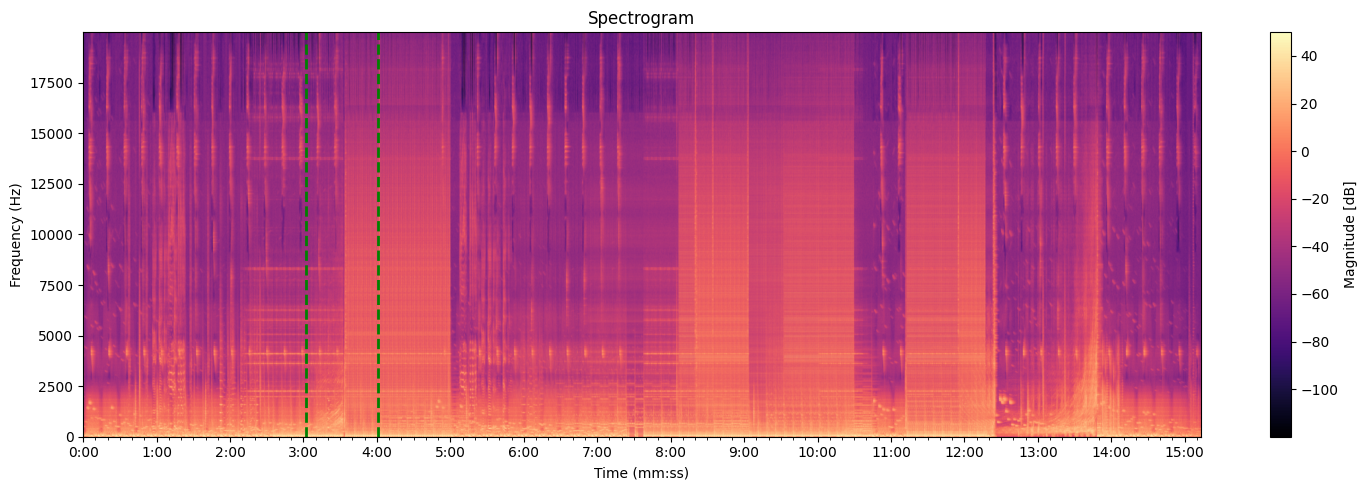

In [9]:
from plotting_functions_for_analysis import plot_spectrogram
plot_spectrogram(analyzer)

Branje spektrograma (vizualizacija Fourierjeve transformacije):

- x-os: čas – večje oznake = 1 minuta, manjše oznake = 10 sekund.
- y-os: frekvenca – nizke note so na dnu (nizka frekvenca), visoke note na vrhu (visoka frekvenca).
- Barva / svetlost – predstavlja amplitudo (glasnost ali energijo) pri določeni frekvenci in času.
- Temnejša področja pomenijo nizko energijo, svetlejša področja pa visoko energijo.

Interpretacija:

- Horizontalne linije – dolgotrajne note ali bas linije skozi celoten track.
- Vertikalni izbruhi – nenadni zvoki ali udarci (perkusivni elementi).
- Gosta svetla področja – visoko-energijske ali hitre sekcije skladbe.
- Redka temna področja – mirne ali tihe sekcije.
- Prehodi barv od modre do rumene/oranžne/rdeče – glasba postaja glasnejša ali bolj “intenzivna”.


<h2>Onset envelope</h2>

Onset envelope zaznava trenutke, ko glasba nenadoma skoči v energiji. 
Značilnost psytrance-a je progresivno naraščanje energije skozi glasbo. 

Zato sva se odločila, da izbrani track razdeliva na tri globalne energijske trende:
- LOW (nizka energija)
- MEDIUM (srednja energija)
- HIGH (visoka energija)

Ti trendi opisujejo globalno strukturo energijskega napredka skladbe.
V animaciji nadzorujejo 'tok' animacije - od teh trendov so odvisne barve in hitrost menjavanja scen.

Trende določimo tako, da zgladimo onset envelope in izberemo dva parametra:
- par33 – določa mejo med LOW in MEDIUM
- par66 – določa mejo med MEDIUM in HIGH

Za najboljše rezultate je priporočljivo, da preverimo graf onset envelope in na njem izberemo ustrezne vrednosti teh parametrov.

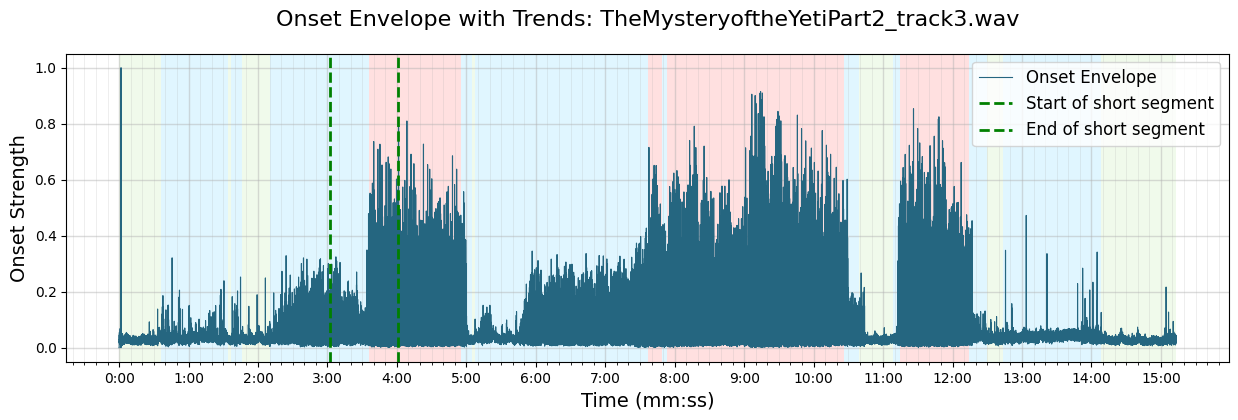

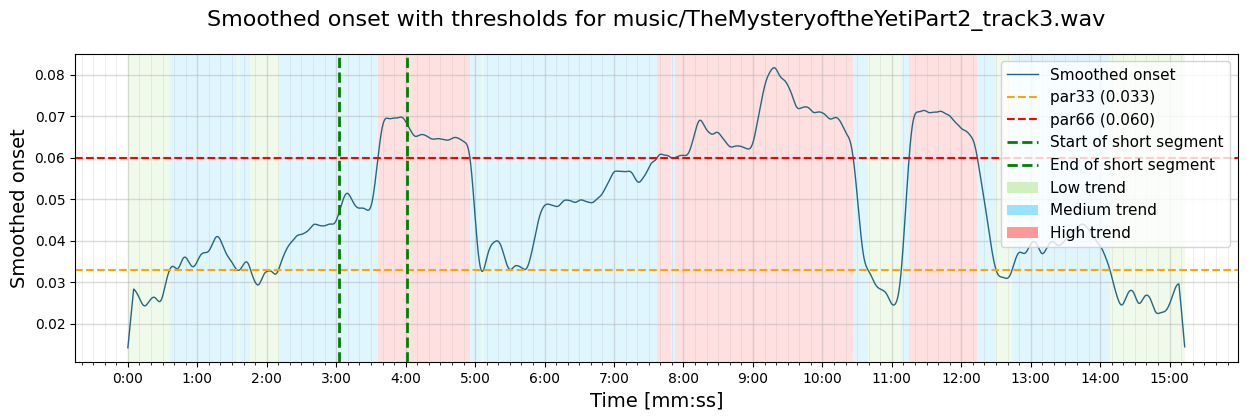

In [10]:
from plotting_functions_for_analysis import plot_smooth_onset_thresholds, plot_onset_with_trend
plot_onset_with_trend(analyzer)
plot_smooth_onset_thresholds(analyzer)

<h2>Beat/pulse tracking </h2>

Udarci oz. beati so v psytrance-u redni in enakomerno porazdeljeni.
Tempo oz. ocenjen BPM (beats per minute), oziroma število udarcev na minuto, je praviloma okoli 140-150.

Udarci so v animaciji usklajeni z zoom-om v fraktal. Ker je beatov preveč, 
se odločimo za prag, ter kot sprožilec efektov vzamemo vsakega drugega/tretjega.

Pulse je izračunan iz zaznanih beatov. 
Gre za vrednosti med 0 in 1, ter meri moč ritmičnega udarca v danem trenutku.
Dogodki v animaciji (sprememba barv, menjavanje scen) so sproženi, kadar je pulse blizu vrednosti 1.


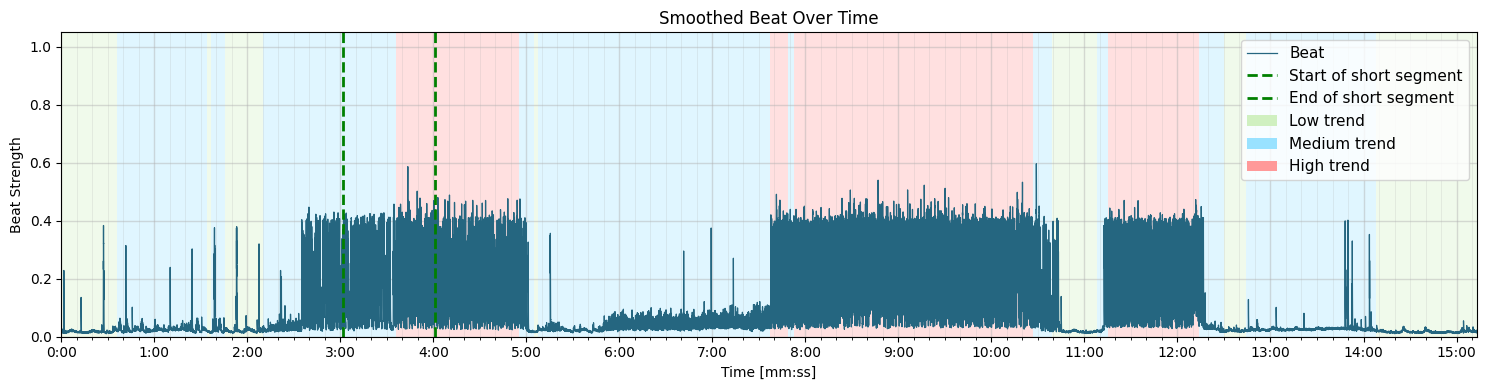

In [11]:
from plotting_functions_for_analysis import plot_beat
plot_beat(analyzer)

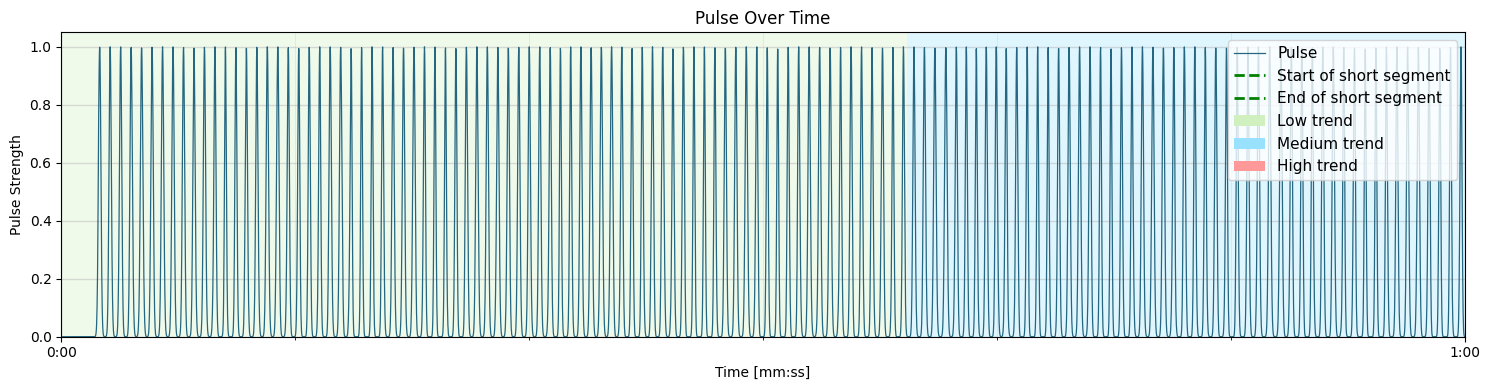

In [12]:
from plotting_functions_for_analysis import plot_pulse
plot_pulse(analyzer)